### Creating the Model with Tensorflow

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import tensorflow as tf
from sklearn.model_selection import KFold, cross_val_score

In [2]:
df_preprocessed = pd.read_csv('https://raw.githubusercontent.com/LastExile16/DataScience/main/case_study/S58_L411/Absenteeism_preprocessed.csv')
df_preprocessed.describe()

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
count,700.000000,700.000000,700.000000,700.000000,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,0.250000,0.008571,0.090000,0.945714,6.36000,2.011429,222.347143,29.892857,36.417143,271.801774,26.737143,0.167143,1.021429,0.687143,6.761429
std,0.433322,0.092250,0.286386,0.226743,3.50501,1.480396,66.312960,14.804446,6.379083,40.021804,4.254701,0.373370,1.112215,1.166095,12.670082
min,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,118.000000,5.000000,27.000000,205.917000,19.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,3.00000,1.000000,179.000000,16.000000,31.000000,241.476000,24.000000,0.000000,0.000000,0.000000,2.000000
50%,0.000000,0.000000,0.000000,1.000000,6.00000,2.000000,225.000000,26.000000,37.000000,264.249000,25.000000,0.000000,1.000000,0.000000,3.000000
75%,0.250000,0.000000,0.000000,1.000000,10.00000,3.000000,260.000000,50.000000,40.000000,294.217000,31.000000,0.000000,2.000000,1.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,12.00000,6.000000,388.000000,52.000000,58.000000,378.884000,38.000000,1.000000,4.000000,8.000000,120.000000


#### Target data for classification
* set median value as the threshold to cut samples into excessive absence and regular absence
* using median, the resulting dataset will be balanced between the two classes
* But, keep in mind that such decision should be made according to the requests and questions you are trying to answer.

In [3]:
med = df_preprocessed['Absenteeism Time in Hours'].median(axis=0)
med

3.0

In [4]:
targets = df_preprocessed['Absenteeism Time in Hours'].map(lambda x: 1 if (x>med) else 0)
df_preprocessed['Excessively Absenteeism'] = targets
df_with_targets = df_preprocessed.drop(['Absenteeism Time in Hours'], axis=1)

In [5]:
df_with_targets.describe()

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Excessively Absenteeism
count,700.000000,700.000000,700.000000,700.000000,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,0.250000,0.008571,0.090000,0.945714,6.36000,2.011429,222.347143,29.892857,36.417143,271.801774,26.737143,0.167143,1.021429,0.687143,0.455714
std,0.433322,0.092250,0.286386,0.226743,3.50501,1.480396,66.312960,14.804446,6.379083,40.021804,4.254701,0.373370,1.112215,1.166095,0.498391
min,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,118.000000,5.000000,27.000000,205.917000,19.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,3.00000,1.000000,179.000000,16.000000,31.000000,241.476000,24.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,6.00000,2.000000,225.000000,26.000000,37.000000,264.249000,25.000000,0.000000,1.000000,0.000000,0.000000
75%,0.250000,0.000000,0.000000,1.000000,10.00000,3.000000,260.000000,50.000000,40.000000,294.217000,31.000000,0.000000,2.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,12.00000,6.000000,388.000000,52.000000,58.000000,378.884000,38.000000,1.000000,4.000000,8.000000,1.000000


#### select the inputs

In [6]:
unscaled_inputs = df_with_targets.iloc[:, :-1]

In [7]:
dummy_cols = ['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4']

# tobe_scaled_cols = ['Month Value',
#        'Day of the Week', 'Transportation Expense', 'Distance to Work',
#        'Age', 'Daily Work Load Average', 'Body Mass Index', 'Education',
#        'Children', 'Pets']
tobe_scaled_cols = unscaled_inputs.loc[:, ~unscaled_inputs.columns.isin(dummy_cols)].columns.values

In [8]:
from sklearn.preprocessing import StandardScaler
absenteeism_scaler = StandardScaler()
absenteeism_scaler.fit(unscaled_inputs[tobe_scaled_cols])
scaled_inputs = absenteeism_scaler.transform(unscaled_inputs[tobe_scaled_cols])
scaled_inputs_df = pd.DataFrame(data=scaled_inputs, columns=tobe_scaled_cols)
scaled_inputs_df = pd.concat([unscaled_inputs[dummy_cols], scaled_inputs_df], axis=1)
scaled_inputs_df.describe()

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets
count,700.000000,700.000000,700.000000,700.000000,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,700.000000,7.000000e+02,7.000000e+02
mean,0.250000,0.008571,0.090000,0.945714,-8.120488e-17,-1.040438e-16,-2.131628e-16,5.582836e-17,1.319579e-16,-8.526513e-16,1.446462e-16,0.000000,9.135549e-17,-1.268826e-17
std,0.433322,0.092250,0.286386,0.226743,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715,1.000715e+00,1.000715e+00
min,0.000000,0.000000,0.000000,0.000000,-1.530333e+00,-1.359682e+00,-1.574681e+00,-1.682647e+00,-1.477309e+00,-1.647399e+00,-1.819793e+00,-0.447980,-9.190300e-01,-5.896898e-01
25%,0.000000,0.000000,0.000000,1.000000,-9.593133e-01,-6.837035e-01,-6.541427e-01,-9.390957e-01,-8.498113e-01,-7.582731e-01,-6.437820e-01,-0.447980,-9.190300e-01,-5.896898e-01
50%,0.000000,0.000000,0.000000,1.000000,-1.027836e-01,-7.725463e-03,4.003371e-02,-2.631399e-01,9.143539e-02,-1.888514e-01,-4.085798e-01,-0.447980,-1.928035e-02,-5.896898e-01
75%,0.250000,0.000000,0.000000,1.000000,1.039256e+00,6.682526e-01,5.682114e-01,1.359154e+00,5.620587e-01,5.604758e-01,1.002633e+00,-0.447980,8.804693e-01,2.684866e-01
max,1.000000,1.000000,1.000000,1.000000,1.610276e+00,2.696187e+00,2.499833e+00,1.494345e+00,3.385799e+00,2.677510e+00,2.649049e+00,2.232242,2.679969e+00,6.275721e+00


In [9]:
scaled_inputs_df.shape

(700, 14)

#### Divide the data into train, validation and test
* Instead of manual shuffle and manual division, this time we use sklearn ready function

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_inputs_df, targets, train_size=0.9, random_state=42, shuffle=True)

#### divide the training data again, this time to extract the validation dataset

In [11]:
# test_input, validation_input, test_target, validation_target = train_test_split(test_input, test_target, train_size=0.5, random_state=42)

In [12]:
# tf.reshape(x_train, [-1])
print(x_train.shape[1:])
print(y_train.shape)
# print(validation_input.shape)
# print(validation_target.shape)
print(x_test.shape)
print(y_test.shape)

(14,)
(630,)
(70, 14)
(70,)


## set the Hyperparameters

In [13]:
# tf.random.set_seed(42)
tf.keras.utils.set_random_seed(42)  # sets seeds for base-python, numpy and tf
tf.config.experimental.enable_op_determinism() # ensure reproducibility  even on GPU

HIDDEN_LAYER_SIZE = 5
INPUT_SIZE = x_train.shape[1:]
OUTPUT_SIZE = 1

BATCH_SIZE = 10
MAX_EPOCHS = 100

In [14]:
x_train.shape[1:]

(14,)

In [15]:
# model_old = tf.keras.Sequential([
#                             tf.keras.Input(shape=x_train.shape[1:]),
#                             # tf.keras.layers.Dense(HIDDEN_LAYER_SIZE*2, activation='relu'),
#                             tf.keras.layers.Dense(HIDDEN_LAYER_SIZE, activation='relu'),
#                             tf.keras.layers.Dense(OUTPUT_SIZE, activation='sigmoid')
#                             ])
# model = tf.keras.Sequential([
#                             tf.keras.layers.Dense(HIDDEN_LAYER_SIZE, activation='relu',
#                                                   kernel_initializer=initi, 
#                                                   kernel_constraint=tf.keras.constraints.MaxNorm(3)),
#                             tf.keras.layers.Dense(OUTPUT_SIZE, activation='sigmoid', kernel_initializer=initi, 
#                                                   kernel_constraint=tf.keras.constraints.MaxNorm(3))
#                             ])
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier



#### Optimization and loss function

In [16]:
def tf_classifier():
  initi=tf.keras.initializers.variance_scaling(seed=42)
  model = tf.keras.Sequential([
                            tf.keras.layers.Dense(OUTPUT_SIZE, input_shape=x_train.shape[1:], activation='sigmoid', kernel_initializer=initi, 
                                                  kernel_constraint=tf.keras.constraints.MaxNorm(3))
                            ])
  custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
  custom_loss_fn = tf.keras.losses.BinaryCrossentropy()
  # custom_loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
  METRICS = [
      # tf.keras.metrics.Accuracy(),
      tf.keras.metrics.CategoricalAccuracy(),
      tf.keras.metrics.BinaryAccuracy,
  ]
  model.compile(optimizer=custom_optimizer, loss=custom_loss_fn, metrics=['accuracy'])
  return model

* cross_val_score is almost meaningless for a neural network model because
* it will split the data into k-folds and train the model on k-1 fold, then in the end
* it will test using the remaining fold.
* in this case, where _model = wrapped TF model or direct sklearn model_:
  * _cross_val_score(model, input, target, split, scoring)_ function splits the data into two halves say A(input, target), B(input, target).
  * then the crossval function will call the model to fit the given data according to the split.
  * that means, fit and evaluate will be called twice, 
    1. Training Data A: model will run specificed epochs on A then evaluated on B
    2. Training Data B: model will run specified epcohs on B then evaluated on A
  * as the result, our model will be trained on both A and B and of course the evaluation and training result will be better with B.
* that is why it is useless.
* we have to manually use k-1 fold for training and remaining fold for validation during each epoch.
* but doesn't the model use validation data as training by the end!!?

---


* Above quote is wrong, because the model.fit will run independently in each fold. and in each fold the validation fold is only used for validation purposes.



---



---


* If you're satisfied with the performance of your model, you can finalize it. There are two options for doing so:

  1. Save the best performing model instance (check "How to save and load a model with Keras?" - do note that this requires retraining because you haven't saved models with the code above), and use it for generating predictions.
    * however, with _cross_val_score_ function, we cannot store anything because this function is only used to get an idea of the model performance.
  2. Retrain the model, but this time with all the data - i.e., without making the train/test split. Save that model, and use it for generating predictions. I do suggest to continue using a validation set, as you want to know when the model is overfitting.

Both sides have advantages and disadvantages. The advantages of the first are that you don't have to retrain, as you can simply use the best-performing fold which was saved during the training procedure. As retraining may be expensive, this could be an option, especially when your model is large. However, the disadvantage is that you simply miss out a percentage of your data - which may bring your training sample closer to the actual patterns in the population rather than your sample. If that's the case, then the second option is better.
https://github.com/christianversloot/machine-learning-articles/blob/main/how-to-use-k-fold-cross-validation-with-keras.md

In [17]:
from sklearn.utils import shuffle
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3, restore_best_weights=True)
# callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5) 

# model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=200, verbose=2, callbacks=[callback])
mymodel = tf_classifier
tf_clf = KerasClassifier(build_fn=mymodel, epochs=200, batch_size=BATCH_SIZE, verbose=0, callbacks=[callback])
score_lr = cross_val_score(tf_clf, x_train, y_train, cv=5, scoring='accuracy')

print(score_lr)
np.average(score_lr)


<ipython-input-17-8f8e4dc041fe>:7: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  tf_clf = KerasClassifier(build_fn=mymodel, epochs=200, batch_size=BATCH_SIZE, verbose=0, callbacks=[callback])


4/4 [==============================] - 0s 2ms/step
[0.65873016 0.65873016 0.75396825 0.72222222 0.58730159]


0.6761904761904762

### K-Fold manually without cross_val_score function

#### convert the dataframe to numpy for easy index access instead of using iloc

In [18]:
x_train_np = x_train.to_numpy()
y_train_np = y_train.to_numpy()
print(x_train_np.shape)
print(y_train_np.shape)
print(x_test.shape)
print(y_test.shape)


(630, 14)
(630,)
(70, 14)
(70,)


#### Create K-Fold cross validator

In [19]:
# Define the K-fold Cross Validator
from sklearn.model_selection import KFold, StratifiedKFold
NUM_FOLDS = 10
# Define per-fold score containers 
acc_per_fold = []
loss_per_fold = []
history_models = []

kfold = KFold(n_splits=NUM_FOLDS, shuffle=True)
kfold = StratifiedKFold(n_splits=NUM_FOLDS, shuffle=True)


In [20]:
630*0.1

63.0

* Actually _kfold.split(X,y)_ doesn't need y because it just returns the index, however there are different types of splits and some of them splits with respect to the classes in y to make the test set representative of all classes
* https://stackoverflow.com/questions/70438717/why-do-we-need-to-give-y-in-sklearns-kfold-split

In [21]:
# callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3, restore_best_weights=True)
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5, restore_best_weights=True) 
fold_no = 1
for train_index, test_index in kfold.split(X=x_train_np, y=y_train_np):
#  print('Fold %d: train index: %s,\ntest index: %s \n========================================================\n' 
      #  % (n_folds, train_index, test_index))

  model = tf_classifier()
  model.fit(x_train_np[train_index], y_train_np[train_index], 
                        validation_data=(x_train_np[test_index], y_train_np[test_index]),
                        batch_size=BATCH_SIZE, epochs=200, 
                        verbose=0, callbacks=[callback])
  history_models.append(model)
  # Generate generalization metrics
  scores = model.evaluate(x_train_np[test_index], y_train_np[test_index], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%\n================================================\n')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])
  fold_no += 1

Restoring model weights from the end of the best epoch: 129.
Epoch 134: early stopping
Score for fold 1: loss of 0.5599280595779419; accuracy of 66.66666865348816%

Restoring model weights from the end of the best epoch: 83.
Epoch 88: early stopping
Score for fold 2: loss of 0.5649121999740601; accuracy of 74.60317611694336%

Restoring model weights from the end of the best epoch: 127.
Epoch 132: early stopping
Score for fold 3: loss of 0.547220766544342; accuracy of 77.77777910232544%

Restoring model weights from the end of the best epoch: 136.
Epoch 141: early stopping
Score for fold 4: loss of 0.5441316962242126; accuracy of 69.84127163887024%

Restoring model weights from the end of the best epoch: 114.
Epoch 119: early stopping
Score for fold 5: loss of 0.59671950340271; accuracy of 73.01587462425232%

Restoring model weights from the end of the best epoch: 71.
Epoch 76: early stopping
Score for fold 6: loss of 0.5898900032043457; accuracy of 66.66666865348816%

Restoring model w

In [22]:
# no folding: train accuracy: 0.7381, one layer model .7460, perceptron .7476
# no folding: test accuracy: 0.6857, one layer model .6867, perceptron .7286
# with folds binary classification: overall model accuracy 74.60, std: 6.11, min: 66.67, max:82.54
# with folds binary classification evaluation on actual test data: loss: 0.5709 - accuracy: 0.7714

acc_per_fold = np.array(acc_per_fold)
overall_acc = acc_per_fold.mean()
std_acc = acc_per_fold.std()
min_acc = acc_per_fold.min()
max_acc = acc_per_fold.max()
print(f'overall model accuracy {overall_acc:.2f}, std: {std_acc:.2f}, min: {min_acc:.2f}, max:{max_acc:.2f}')

overall model accuracy 74.60, std: 6.11, min: 66.67, max:82.54


In [23]:
print(history_models[8].layers[0].weights)
print(history_models[8].summary())


[<tf.Variable 'dense_13/kernel:0' shape=(14, 1) dtype=float32, numpy=
array([[ 1.9518446 ],
       [-0.33654594],
       [ 1.9773908 ],
       [ 0.53070253],
       [ 0.09870972],
       [-0.1959503 ],
       [ 0.651957  ],
       [-0.05481351],
       [-0.27361557],
       [-0.02469272],
       [ 0.23087916],
       [-0.05726736],
       [ 0.40767634],
       [-0.33296844]], dtype=float32)>, <tf.Variable 'dense_13/bias:0' shape=(1,) dtype=float32, numpy=array([-1.264616], dtype=float32)>]
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 1)                 15        
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________
None


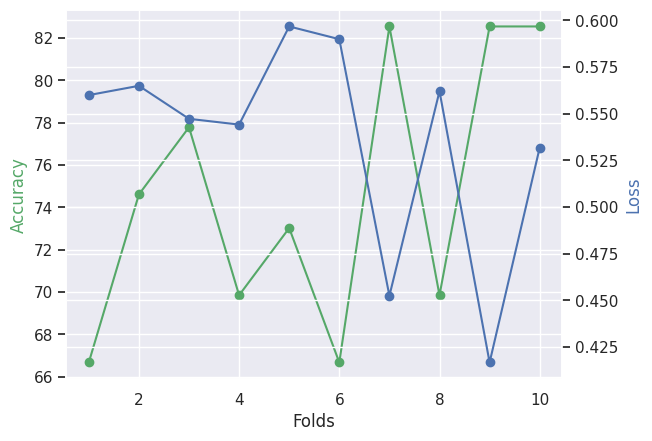

In [24]:
folds = range(1, acc_per_fold.shape[0]+1)

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(folds, acc_per_fold, 'g-', marker='o')
ax2.plot(folds, loss_per_fold, 'b-', marker='o')

ax1.set_xlabel('Folds')
ax1.set_ylabel('Accuracy', color='g')
ax2.set_ylabel('Loss', color='b')

plt.show()

* How to Finalize the model
  * [How to Train a Final Machine Learning Model - MachineLearningMastery.com](https://machinelearningmastery.com/train-final-machine-learning-model/)
* KFold and test-split are two different types of cross-validation
  * [Understanding 8 types of Cross-Validation | by Satyam Kumar | Towards Data Science](https://towardsdatascience.com/understanding-8-types-of-cross-validation-80c935a4976d)
* Visualize the kfold split behavior
  * [Visualizing cross-validation behavior in scikit-learn — scikit-learn 1.2.2 documentation](https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html#visualize-cross-validation-indices-for-many-cv-objects)



In [25]:
# print(model.layers[0].weights)
# print(model.layers[0].bias.numpy())
# print(model.layers[0].bias_initializer)


In [26]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', mode='min', verbose=1, patience=5, restore_best_weights=True) 
history_models[8].fit(x_train_np, y_train_np,
                      batch_size=BATCH_SIZE, epochs=200, 
                      verbose=1, callbacks=[callback])
# Generate generalization metrics
scores = history_models[8].evaluate(x_test, y_test)

Epoch 1/200
63/63 [==============================] - 0s 2ms/step - loss: 0.5141 - accuracy: 0.7635
Epoch 2/200
63/63 [==============================] - 0s 2ms/step - loss: 0.5141 - accuracy: 0.7635
Epoch 3/200
63/63 [==============================] - 0s 2ms/step - loss: 0.5139 - accuracy: 0.7619
Epoch 4/200
63/63 [==============================] - 0s 2ms/step - loss: 0.5135 - accuracy: 0.7619
Epoch 5/200
63/63 [==============================] - 0s 2ms/step - loss: 0.5134 - accuracy: 0.7635
Epoch 6/200
63/63 [==============================] - 0s 1ms/step - loss: 0.5135 - accuracy: 0.7667
Epoch 7/200
63/63 [==============================] - 0s 2ms/step - loss: 0.5135 - accuracy: 0.7635
Epoch 8/200
63/63 [==============================] - 0s 2ms/step - loss: 0.5133 - accuracy: 0.7651
Epoch 9/200
63/63 [==============================] - 0s 2ms/step - loss: 0.5131 - accuracy: 0.7651
Epoch 10/200
63/63 [==============================] - 0s 1ms/step - loss: 0.5132 - accuracy: 0.7667
Epoch 11/